# **9. Additional Linear Modeling Topics**

## **9.1 Handling Highly Correlated Variables**

### **9.1.1 An Initial Linear Model of Online Spend**

In [51]:
(cust.df = read.csv('http://goo.gl/PmPkaG'))

cust.id,age,credit.score,email,distance.to.store,online.visits,online.trans,online.spend,store.trans,store.spend,sat.service,sat.selection
1,22.89437,630.6089,yes,2.582494,20,3,58.42999,4,140.32321,3,3
2,28.04994,748.5746,yes,48.175989,121,39,756.88008,0,0.00000,3,3
3,35.87942,732.5459,yes,1.285712,39,14,250.32801,0,0.00000,NA,NA
4,30.52740,829.5889,yes,5.253992,1,0,0.00000,2,95.91194,4,2
5,38.73575,733.7968,no,25.044693,35,11,204.69331,0,0.00000,1,1
6,42.41277,685.8721,yes,18.462041,1,1,19.01065,0,0.00000,NA,NA
7,28.29395,724.5464,yes,9.344021,1,1,18.71620,2,63.52374,3,3
8,36.49065,748.5761,yes,6.917499,48,13,255.81918,4,74.98433,2,3
9,30.37076,689.6656,no,12.848213,0,0,0.00000,0,0.00000,4,2
10,26.58999,786.5158,no,6.618326,14,6,123.67176,3,103.41961,3,2


In [52]:
summary(cust.df)

    cust.id            age         credit.score   email     distance.to.store 
 Min.   :   1.0   Min.   :19.34   Min.   :543.0   no :186   Min.   :  0.2136  
 1st Qu.: 250.8   1st Qu.:31.43   1st Qu.:691.7   yes:814   1st Qu.:  3.3383  
 Median : 500.5   Median :35.10   Median :725.5             Median :  7.1317  
 Mean   : 500.5   Mean   :34.92   Mean   :725.5             Mean   : 14.6553  
 3rd Qu.: 750.2   3rd Qu.:38.20   3rd Qu.:757.2             3rd Qu.: 16.6589  
 Max.   :1000.0   Max.   :51.86   Max.   :880.8             Max.   :267.0864  
                                                                              
 online.visits     online.trans      online.spend      store.trans    
 Min.   :  0.00   Min.   :  0.000   Min.   :   0.00   Min.   : 0.000  
 1st Qu.:  0.00   1st Qu.:  0.000   1st Qu.:   0.00   1st Qu.: 0.000  
 Median :  6.00   Median :  2.000   Median :  37.03   Median : 1.000  
 Mean   : 28.29   Mean   :  8.385   Mean   : 170.32   Mean   : 1.323  
 3rd Qu.: 31.

Now we use lm() to model spend as a function of all other variables (online.spend ∼ .). We omit customers with zero online spend; having exactly zero spend is probably related to different factors than positive spend, and we are interested here in the associations for those who spend anything. We also index[ , -1] to omit the customer ID column:

In [53]:
spend.m1 = lm(online.spend ~ ., data=subset(cust.df[,-1], online.spend>0))
summary(spend.m1)


Call:
lm(formula = online.spend ~ ., data = subset(cust.df[, -1], online.spend > 
    0))

Residuals:
     Min       1Q   Median       3Q      Max 
-234.097   -8.828    0.519    9.956  227.238 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)        6.718948  33.537665   0.200   0.8413    
age                0.422773   0.450825   0.938   0.3489    
credit.score      -0.033698   0.043977  -0.766   0.4440    
emailyes          -5.689283   5.806621  -0.980   0.3278    
distance.to.store -0.043548   0.100539  -0.433   0.6651    
online.visits     -0.072269   0.204061  -0.354   0.7234    
online.trans      20.610744   0.667450  30.880   <2e-16 ***
store.trans        0.135018   3.211943   0.042   0.9665    
store.spend        0.001796   0.078732   0.023   0.9818    
sat.service        5.638769   3.016181   1.870   0.0623 .  
sat.selection     -4.370606   2.909073  -1.502   0.1338    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Re

>First, online spend is closely related to the number of online transactions (coefficient = 20.6) but not to the number of online visits. That is puzzling. Second, the model accounts for almost all the available variance, R2 = 0.98. These results should cause concern. And notice that the standard error on store.trans is quite large, showing that its estimate is very uncertain.

In [54]:
install.packages('gpairs')
library(gpairs)

Installing package into 'C:/Users/cl44343/Documents/R/win-library/3.4'
(as 'lib' is unspecified)
Warning message:
"package 'gpairs' is in use and will not be installed"

In [55]:
library(grid)

In [56]:
library(lattice)

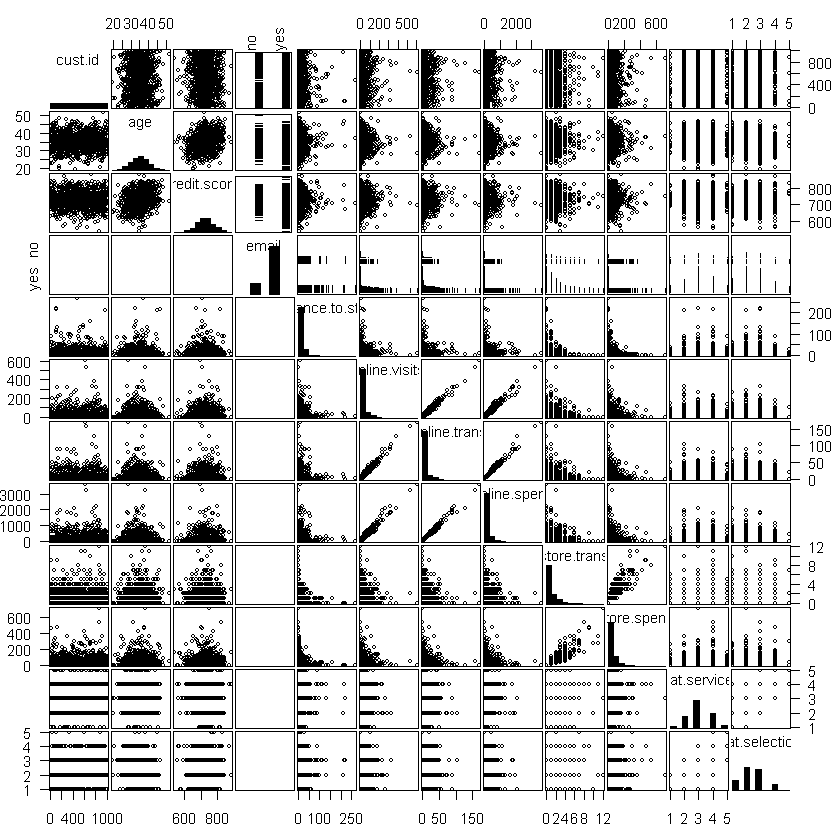

In [57]:
gpairs(cust.df)

>Fig. 9.1. Visualization of the customer data using gpairs(). Several variables have extreme
skew and other pairs are nearly perfectly correlated; both situations pose problems for linear
modeling.

#### Our first step to remediate the situation is to transform the data using a Box–Cox transformation. Building on the transformation routines we saw in Sect. 4.5.5, we write a short function that uses BoxCox.lambda() from the forecast package to select the transformation lambda automatically [82]. At the same time, we standardize the data with scale() (Sect. 7.3.3):

In [58]:
autoTransform = function(x) {
    library(forecast)
    return(scale(BoxCox(x, BoxCox.lambda(x))))
}

In [59]:
install.packages('forecast')

Installing package into 'C:/Users/cl44343/Documents/R/win-library/3.4'
(as 'lib' is unspecified)
Warning message:
"package 'forecast' is in use and will not be installed"

We select the complete cases from our data frame, dropping the customer ID column ([, -1]) because it is not a predictor. Then we take only the rows with positive online spend. We create a vector to index all the columns except email (which is not numeric), and then lapply() the autoTransform() function to each numeric column:

In [60]:
cust.df.bc = cust.df[complete.cases(cust.df), -1]
cust.df.bc = subset(cust.df.bc, online.spend>0)
numcols    = which(colnames(cust.df.bc) != 'email')
cust.df.bc[, numcols] = lapply(cust.df.bc[, numcols], autoTransform)

In [61]:
cust.df.bc

,age,credit.score,email,distance.to.store,online.visits,online.trans,online.spend,store.trans,store.spend,sat.service,sat.selection
1,-2.428952884,-1.933850081,yes,-0.94785696,0.05805482,-0.53240767,-0.55554635,1.0216787,0.9457336,-0.09177965,0.7455990
2,-1.287236516,0.495559147,yes,1.41401190,1.22896924,1.31082233,1.27381034,-1.3303670,-1.3373428,-0.09177965,0.7455990
5,0.912814899,0.207989894,no,0.98442207,0.44946213,0.50346426,0.45244103,-1.3303670,-1.3373428,-2.24116588,-1.6476883
7,-1.234694402,0.025724045,yes,0.23794532,-2.54780116,-1.61057727,-1.70800915,0.7660742,0.7551173,-0.09177965,0.7455990
8,0.465979291,0.495587591,yes,-0.01619594,0.65906657,0.62047038,0.60753351,1.0216787,0.7936471,-1.21839266,0.7455990
10,-1.604259094,1.214532691,no,-0.05469028,-0.20545270,0.04922013,0.07635248,0.9120130,0.8703658,-0.09177965,-0.3270153
11,1.518406861,-0.022663114,no,-0.05312508,-1.85922292,-1.61057727,-1.61965900,-1.3303670,-1.3373428,-0.09177965,-0.3270153
14,-0.465559651,0.184306554,no,-0.54368981,1.16226573,1.07124343,1.14417814,0.9120130,0.7554584,-2.24116588,-0.3270153
19,0.556484358,-0.359720222,yes,-1.63142802,-0.10548064,0.16931824,0.22459895,-1.3303670,-1.3373428,-1.21839266,-0.3270153
22,-0.003696186,1.734430624,yes,0.92978069,0.18846650,0.04922013,0.07177407,0.5382470,0.5223391,-1.21839266,-1.6476883


>The result is a data frame with standardized, more normally distributed values, which we can check with summary() and gpairs():

In [62]:
summary(cust.df.bc)

        age.V1          credit.score.V1   email     distance.to.store.V1
 Min.   :-2.6028151   Min.   :-3.549645   no : 67   Min.   :-4.151249   
 1st Qu.:-0.6102340   1st Qu.:-0.664190   yes:351   1st Qu.:-0.642231   
 Median : 0.0319899   Median : 0.024254             Median : 0.110540   
 Mean   : 0.0000000   Mean   : 0.000000             Mean   : 0.000000   
 3rd Qu.: 0.6444580   3rd Qu.: 0.687857             3rd Qu.: 0.723209   
 Max.   : 2.4751221   Max.   : 2.691592             Max.   : 2.235170   
   online.visits.V1     online.trans.V1      online.spend.V1   
 Min.   :-2.5478012   Min.   :-1.6105773   Min.   :-1.9847582  
 1st Qu.:-0.6422584   1st Qu.:-0.9065743   1st Qu.:-0.7686352  
 Median : 0.1265838   Median : 0.1092692   Median : 0.1358798  
 Mean   : 0.0000000   Mean   : 0.0000000   Mean   : 0.0000000  
 3rd Qu.: 0.8231873   3rd Qu.: 0.8739755   3rd Qu.: 0.8897866  
 Max.   : 1.7768679   Max.   : 1.8204545   Max.   : 1.7784232  
    store.trans.V1       store.spend.V1  

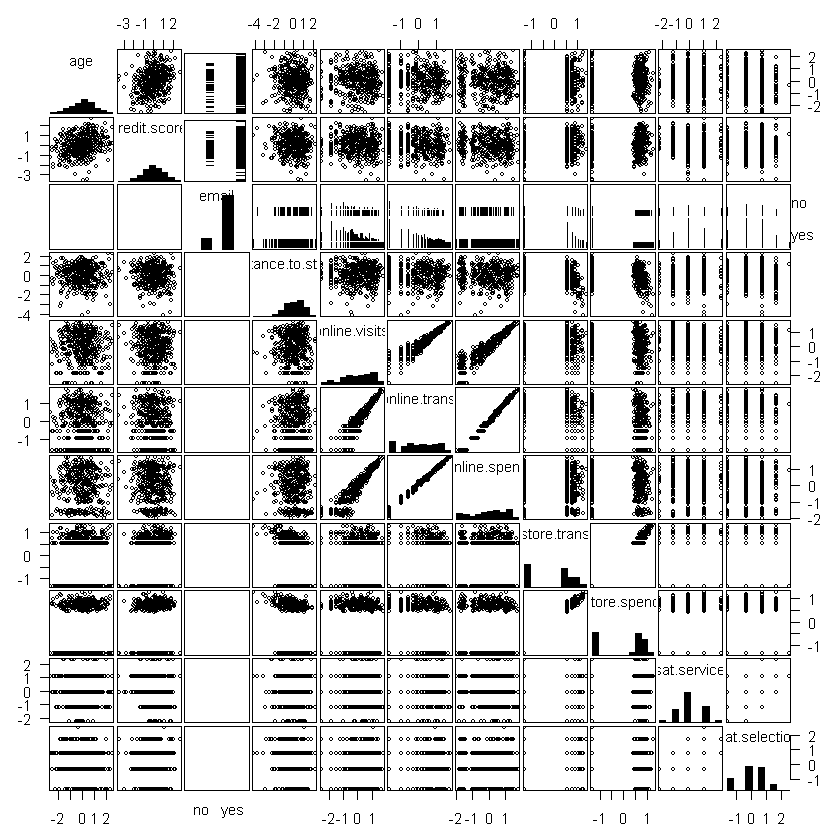

In [63]:
gpairs(cust.df.bc)

We refit the model using the transformed data:

In [64]:
spend.m2 = lm(online.spend ~., data=cust.df.bc)
summary(spend.m2)


Call:
lm(formula = online.spend ~ ., data = cust.df.bc)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.38976 -0.05409  0.00027  0.05591  0.26628 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -0.0059639  0.0108943  -0.547    0.584    
age                0.0001875  0.0044821   0.042    0.967    
credit.score      -0.0026632  0.0045185  -0.589    0.556    
emailyes           0.0071023  0.0119316   0.595    0.552    
distance.to.store -0.0020362  0.0048800  -0.417    0.677    
online.visits     -0.0003913  0.0126165  -0.031    0.975    
online.trans       0.9960378  0.0126687  78.622   <2e-16 ***
store.trans       -0.0266674  0.0480675  -0.555    0.579    
store.spend        0.0274099  0.0475888   0.576    0.565    
sat.service        0.0059429  0.0052732   1.127    0.260    
sat.selection      0.0030628  0.0052624   0.582    0.561    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error:

> The coefficients are smaller now because the data have been standardized. Transforming and standardizing the data, although a good idea, have not changed the unbelievable estimate that online spend is highly related to transactions yet unrelated to visits.

In [65]:
spend.m3 = lm(online.spend ~ online.trans, data=cust.df.bc)
anova(spend.m3, spend.m2)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
416,3.153871,NA,NA,NA,NA
407,3.113870,9,0.04000116,0.5809303,0.8129412


>Indeed, the full model is no better than one that simply predicts spending from the number of transactions alone (see Sect. 6.5.1 on using anova() to compare models). The small difference between the model fits is reflected in the high p-value (p = 0.8129), and thus the null hypothesis of no difference between the models cannot be rejected.

#### The problem here is *collinearity*: because visits and transactions are so highly related, and also because a linear model assumes that effects are additive, an effect attributed to one variable (such as transactions) is not available in the model to be attributed jointly to another that is highly correlated (visits). This will cause the standard errors of the predictors to increase, which means that the coefficient estimates will be highly uncertain or unstable. As a practical consequence, this may cause coefficient estimates to differ dramatically from sample to sample due to minor variations in the data even when underlying relationships are the same.

### **9.1.2 Remediating Collinearity**

The degree of collinearity in data can be assessed as the *variance inflation factor* (VIF). This estimates how much the standard error (variance) of a coefficient in a linear model is increased because of shared variance with other variables, compared to the situation if the variables were uncorrelated or simple single predictor regression were performed.

In [66]:
library(car)

In [67]:
vif(spend.m2)

age      credit.score             email distance.to.store 
         1.094949          1.112784          1.046874          1.297978 
    online.visits      online.trans       store.trans       store.spend 
         8.675817          8.747756        125.931383        123.435407 
      sat.service     sat.selection 
         1.515576          1.509377

> A common rule of thumb is that **VIF > 5.0 indicates the need to mitigate collinearity.** In spend.m2, the VIF suggests that collinearity should be addressed for the online... and store... variables.

#### There are three general strategies for mitigating collinearity:
 + Omit variables that are highly correlated.
 + Eliminate correlation by extracting principal components or factors for sets of highly correlated predictors (see Chap. 8).
 + Use a method that is robust to collinearity, i.e., something other than traditional linear modeling. There are too many options to consider this possibility exhaustively, but one method to consider would be a random forest approach, which only uses a subset of variables at a time (see Sect. 11.4.2).

Another option for the present data would be to construct a new measure of interest
that combines the collinear variables (such as spend per transaction). For purposes
here, we explore the first two options above and create models spend.m4 and
spend.m5.

In [68]:
spend.m4 = lm(online.spend ~ . -online.trans - store.trans, data=cust.df.bc)
vif(spend.m4)
summary(spend.m4)

age      credit.score             email distance.to.store 
         1.081411          1.103586          1.033945          1.211607 
    online.visits       store.spend       sat.service     sat.selection 
         1.026148          1.215208          1.507866          1.509001


Call:
lm(formula = online.spend ~ . - online.trans - store.trans, data = cust.df.bc)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.36373 -0.13135  0.05888  0.18476  1.03794 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -0.0923395  0.0435047  -2.123   0.0344 *  
age               -0.0333779  0.0178813  -1.867   0.0627 .  
credit.score      -0.0084524  0.0180637  -0.468   0.6401    
emailyes           0.1099655  0.0476011   2.310   0.0214 *  
distance.to.store  0.0001702  0.0189271   0.009   0.9928    
online.visits      0.9295374  0.0174184  53.365   <2e-16 ***
store.spend        0.0092463  0.0189552   0.488   0.6260    
sat.service       -0.0121405  0.0211147  -0.575   0.5656    
sat.selection      0.0048591  0.0211226   0.230   0.8182    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3511 on 409 degrees of freedom
Multiple R-squared:  0.8791,	Adjusted R-squared:  0.8767 
F

> The VIF is now acceptable and we see that online visits are now the best predictor
of online spend, although email status and age are also slightly related.

Another approach is to use the principal components of the correlated data. As you
will recall from Chap. 8, principal components are uncorrelated (orthogonal). Thus,
PCA provides a way to extract composite variables that are guaranteed to be free of
collinearity with other variables that are included in the same PCA.

In [69]:
pc.online = prcomp(cust.df.bc[, c('online.visits', 'online.trans')])
cust.df.bc$online = -pc.online$x[ ,1]  #transform direction of PC1 to positive
pc.store  = prcomp(cust.df.bc[, c('store.trans', 'store.spend')])
cust.df.bc$store  = -pc.store$x[ ,1]   #transform direction of PC1 to positive

> We use PCA to extract the first component for the online variables, and then do
this again for the store variables, and add those two initial components to the data
frame

In [70]:
spend.m5 = lm(online.spend ~ email + age + credit.score + distance.to.store +
              sat.service + sat.selection + online + store, data=cust.df.bc)
summary(spend.m5)
vif(spend.m5)


Call:
lm(formula = online.spend ~ email + age + credit.score + distance.to.store + 
    sat.service + sat.selection + online + store, data = cust.df.bc)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.83697 -0.08532  0.01288  0.09664  0.73327 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -3.928e-02  2.410e-02  -1.630   0.1039    
emailyes           4.678e-02  2.638e-02   1.773   0.0769 .  
age               -1.695e-02  9.882e-03  -1.715   0.0871 .  
credit.score      -3.649e-03  9.981e-03  -0.366   0.7148    
distance.to.store -2.666e-05  1.051e-02  -0.003   0.9980    
sat.service       -2.762e-03  1.167e-02  -0.237   0.8130    
sat.selection      3.153e-03  1.167e-02   0.270   0.7872    
online             7.019e-01  6.933e-03 101.247   <2e-16 ***
store              2.712e-03  7.455e-03   0.364   0.7162    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1941 on 409 degrees of

email               age      credit.score distance.to.store 
         1.039458          1.081430          1.103206          1.224019 
      sat.service     sat.selection            online             store 
         1.508487          1.509001          1.032362          1.228073

> VIF poses no problem in this model, and we see that online spend is still associated
primarily with online activity (as captured in the first component of the PCA
model, online) and perhaps slightly with email status and age. One caution when
interpreting results that use principal components as explanatory variables is that the
components have arbitrary numerical direction; the negative coefficient for online
here does not imply that online activity results in lower sales.

## 9.2 Linear Models for Binary Outcomes: Logistic Regression

### 9.2.1 Basics of the Logistic Regression Model

#### The core feature of a logistic model is this: it relates the probability of an outcome to an exponential function of a predictor variable

By modeling the probability of an outcome, a logistic model accomplishes two
things. First, it more directly models what we’re interested in, which is a probability
or proportion, such as the likelihood of a given customer to purchase a product, or
the expected proportion of a segment who will respond to a promotion. Second, it
limits the model to the appropriate range for a proportion, which is [0,1]. A basic
linear model as generated with lm() does not have such a limit and could estimate
a nonsensical probability such as 1.05 or −0.04.

$logistic : p(y) = $$e^{vx} \over (e^{vx} +1)$

>In this equation, the outcome of interest is y, and we compute its likelihood p(y)
as a function of vx. We typically estimate vx as a function of the features (x) of
a product, such as price. vx can take any real value, so we are able to treat it as a
continuous function in a linear model. In that case, vx is composed from one or more
coefficients of the model and indicates the importance of the corresponding features
of the product. This formula gives a value between [0,1]. The likelihood of y is less than 50 %
when vx is negative, is 50 % when vx = 0, and is above 50 % when vx is positive.We
compute this first by hand, and then switch to the equivalent, built-in plogis()
function:

In [71]:
exp(0) / (exp(0)+1)      # computing logistic by hand; could use plogis()

[1] 0.5

In [72]:
plogis(0)

[1] 0.5

In [73]:
?plogis

In [74]:
qlogis(0.5)

[1] 0

In [75]:
plogis(-Inf)             # infinitely low = likelihood 0

[1] 0

> you’ve got to look at the functions for the logistic distribution. In particular, the logit transform, $\mathrm{logit}(x) = \log(\frac{x}{1-x})$, is given in R by: qlogis(x). The inverse logit transform, $\mathrm{invlogit}(x) = \frac{1}{1 + \exp(-x)}$, is given in R by: plogis(x). Check that the inverses are good: for example, plogis(qlogis(0.6)) and qlogis(plogis(0.6)) should both give 0.6. (source :https://stevencarlislewalker.wordpress.com/2012/10/05/logit-transforms-in-r)

In [76]:
plogis(Inf)

[1] 1

In [77]:
plogis(2)                # moderate probability = 88% chance of outcome

[1] 0.8807971

In [78]:
plogis(-0.2)             # weak likelihood

[1] 0.450166

Such a model is known as a logit model, which determines the value of vx from the
logarithm of the relative probability of occurrence of y:

$logit : vx = $$log ({p(y)\over1− p(y)})$

Again, R includes a built-in function qlogis() for the logit function:

In [79]:
log(0.88/(1-0.88))     # moderate high likelihood

[1] 1.99243

In [80]:
qlogis(0.88)          # equivalent to hand computation

[1] 1.99243

### 9.2.2 Data for Logistic Regression of Season Passes

The marketing question is this: are customers more likely to
purchase the season pass when it is offered in the bundle (with free parking), or
not?

In [81]:
(pass.df = read.csv('http://goo.gl/J8MH6A'))

Channel,Promo,Pass
Mail,Bundle,YesPass
Mail,Bundle,YesPass
Mail,Bundle,YesPass
Mail,Bundle,YesPass
Mail,Bundle,YesPass
Mail,Bundle,YesPass
Mail,Bundle,YesPass
Mail,Bundle,YesPass
Mail,Bundle,YesPass
Mail,Bundle,YesPass


In [82]:
pass.df$Promo = factor(pass.df$Promo, levels=c('NoBundle', 'Bundle'))
summary(pass.df)

  Channel          Promo           Pass     
 Email: 633   NoBundle:1482   NoPass :1567  
 Mail :1328   Bundle  :1674   YesPass:1589  
 Park :1195                                 

To convert the data into such format, we first recreate the cross-tab data table in R.
We begin this by reading the values from table of one column and row at a time,
putting them into a vector:

In [83]:
(pass.tab = c(242, 639, 38, 359, 284, 27, 449, 223, 83, 278, 49, 485))

[1] 242 639  38 359 284  27 449 223  83 278  49 485

In [84]:
(dim(pass.tab) = c(3,2,2))

[1] 3 2 2

In [85]:
class(pass.tab) = 'table'

In [86]:
dimnames(pass.tab) = list(Channel = c('Mail', 'Park', 'Email'),
                           Promo   = c('Bundle', 'NoBundle'),
                           Pass    = c('YesPass', 'NoPass'))

>We add the marginal labels to the table by setting its dimnames attribute:

In [87]:
pass.tab

, , Pass = YesPass

       Promo
Channel Bundle NoBundle
  Mail     242      359
  Park     639      284
  Email     38       27

, , Pass = NoPass

       Promo
Channel Bundle NoBundle
  Mail     449      278
  Park     223       49
  Email     83      485


>We describe more about class, table, and dimnames in optional Sect. 9.2.4
below.

### 9.2.4 Language Brief: Classes and Attributes of Objects*

In [88]:
class(c(1, pi, exp(1)))

[1] "numeric"

In [89]:
class(data.frame(1:10))

[1] "data.frame"

In [90]:
str(pass.tab)

 table [1:3, 1:2, 1:2] 242 639 38 359 284 27 449 223 83 278 ...
 - attr(*, "dimnames")=List of 3
  ..$ Channel: chr [1:3] "Mail" "Park" "Email"
  ..$ Promo  : chr [1:2] "Bundle" "NoBundle"
  ..$ Pass   : chr [1:2] "YesPass" "NoPass"


In [91]:
is.table(pass.tab)
is.character(pass.tab)
is.numeric(pass.tab)

[1] TRUE

[1] FALSE

[1] TRUE

In [92]:
attributes(pass.tab)

$dim
[1] 3 2 2

$class
[1] "table"

$dimnames
$dimnames$Channel
[1] "Mail"  "Park"  "Email"

$dimnames$Promo
[1] "Bundle"   "NoBundle"

$dimnames$Pass
[1] "YesPass" "NoPass"

### 9.2.5 Finalizing the Data

In [93]:
install.packages('vcdExtra')

Installing package into 'C:/Users/cl44343/Documents/R/win-library/3.4'
(as 'lib' is unspecified)
Warning message:
"package 'vcdExtra' is in use and will not be installed"

In [94]:
library(vcdExtra)

We have the data in a table pass.tab, which is suitable for analysis as is. However,
because most data sets come in the form of an extended data frame with one
observation per respondent, we expand it from a table to a complete data frame so
the analysis will match typical data structures.

In [95]:
pass.df = expand.dft(pass.tab)
str(pass.df)

'data.frame':	3156 obs. of  3 variables:
 $ Channel: Factor w/ 3 levels "Email","Mail",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ Promo  : Factor w/ 2 levels "Bundle","NoBundle": 1 1 1 1 1 1 1 1 1 1 ...
 $ Pass   : Factor w/ 2 levels "NoPass","YesPass": 2 2 2 2 2 2 2 2 2 2 ...


We can use table() on this data to create cross-tabs other than those in Table
9.1. For example, to see purchases of a pass (Pass) by promotion bundle
(Promo):

In [96]:
table(pass.df$Pass, pass.df$Promo)

         
          Bundle NoBundle
  NoPass     755      812
  YesPass    919      670

We might think that NoBundle should have a lower implicit value (such
as “bundle = 0”) than Bundle (which might be “bundle = 1”). However, in the
table we just saw, NoBundle appears in the second column because it has a higher
value thanks to alphabetic ordering.

In [97]:
pass.df$Promo = factor(pass.df$Promo, levels=c('NoBundle', 'Bundle'))
table(pass.df$Pass, pass.df$Promo)

         
          NoBundle Bundle
  NoPass       812    755
  YesPass      670    919

### 9.2.6 Fitting a Logistic Regression Model

#### A GLM can handle dependent variables that are not normally distributed. Thus, GLM can be used to model data counts (such as number of purchases) or time intervals (such as time spent on a website) or binary variables (e.g., did/didn’t purchase).

The common feature of all GLM models is that they relate
normally distributed predictors to a non-normal outcome using a function known as
a *link*. This means that they are able to fit models for many different distributions
using a single, consistent framework. In the present case, we model a binary outcome, and the appropriate distribution is a
*binomial* distribution (see Sect. 6.3)

In [98]:
pass.m1 = glm(Pass ~ Promo, data=pass.df, family=binomial)
summary(pass.m1)


Call:
glm(formula = Pass ~ Promo, family = binomial, data = pass.df)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.262  -1.097   1.095   1.095   1.260  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -0.19222    0.05219  -3.683 0.000231 ***
PromoBundle  0.38879    0.07167   5.425 5.81e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 4375.0  on 3155  degrees of freedom
Residual deviance: 4345.4  on 3154  degrees of freedom
AIC: 4349.4

Number of Fisher Scoring iterations: 3


>There is a positive coefficient for the bundle condition, and the effect is statistically
significant. What does a coefficient of 0.3888 mean? We can use it to calculate the association
of pass sales, as associated with the promotion bundle factor, by examining the ratio
of success (using plogis()) to non-success (1−success).

In [99]:
plogis(0.3888)                            # logistic regression(CDF), prob(y)

[1] 0.5959938

In [100]:
plogis(0.3888) / (1-plogis(0.3888))       # odds ratio, 47.5% increase

[1] 1.475209

In [101]:
log(plogis(0.3888) / (1-plogis(0.3888)))  # logit outcome, inverse logistic, y

[1] 0.3888

> #### This shows that the effect of Bundle is an estimated *odds ratio* of 1.475, meaning that customers are 1.475 times more likely to purchase the pass when it is offered in the bundle. Another way to think about this is that the bundle increases the purchase likelihood by 47.5 %. An easier and equivalent way to calculate this is to exponentiate the coefficient :

In [102]:
exp(0.3888)                    # odds ratio, inverse-log logit

[1] 1.475209

In [103]:
exp(0.3888)/(exp(0.3888)+1)    # logistic regression (CDF), equal to plogis()

[1] 0.5959938

We can find the odds ratios from the model by extracting the coefficients with
coef() and using exp():

In [104]:
exp(coef(pass.m1))

(Intercept) PromoBundle 
  0.8251232   1.4751962

We can obtain a confidence interval for the odds ratio using exp(confint
(model)):

In [105]:
exp(confint(pass.m1))

Waiting for profiling to be done...


,2.5 %,97.5 %
(Intercept),0.744749,0.9138654
PromoBundle,1.282055,1.6979776


> The odds ratio for the promotion bundle is estimated to be 1.28–1.70, a significant
positive effect. This demonstrates that the promotion is highly effective, right? Not
necessarily, because the effects are estimated *under the assumption that the model
is the one we want to interpret*. But is the model Pass ∼ Promo really the one
we should interpret?

### 9.2.7 Reconsidering the Model

In [106]:
table(pass.df$Pass, pass.df$Channel)

         
          Email Mail Park
  NoPass    568  727  272
  YesPass    65  601  923

>The channel that was most successful in selling season tickets was at the park, regardless
of whether the promotion was offered.

A good way to visualize tables is with mosaic plots, which lay out “tiles” whose
areas correspond to counts in a table.

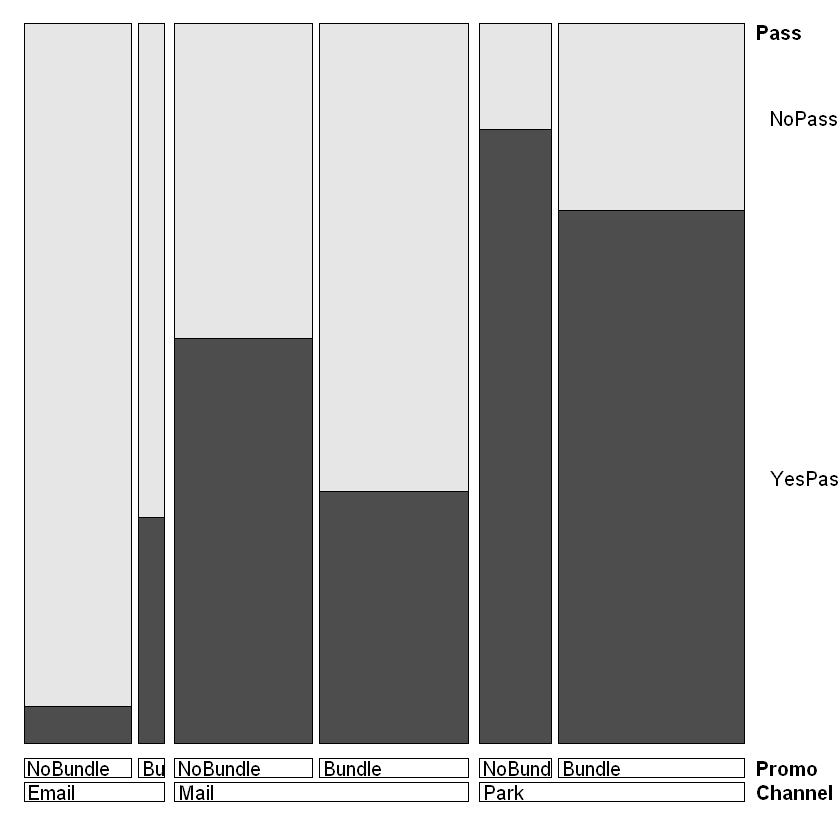

In [107]:
library(vcd)
doubledecker(table(pass.df))

>Fig. 9.2. A mosaic plot created with doubledecker() [113] for sales of season passes
by channel and promotion in simulated amusement park data. Season passes (“YesPass,”
plotted as dark areas) are sold most frequently at the park and least frequently by email.
The promotion bundle (“Bundle,” the second column within each channel) is associated with
higher sales through the email channel, but lower sales in regular mail and at the park, thus **this implies that our model *Pass ∼ Promo* may be
inadequate and needs to account for the effect of Channel
showing an interaction effect.**

In [108]:
pass.m2 = glm(Pass ~ Promo + Channel, data=pass.df, family=binomial)
summary(pass.m2)


Call:
glm(formula = Pass ~ Promo + Channel, family = binomial, data = pass.df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9079  -0.9883   0.5946   0.7637   2.3272  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.07860    0.13167 -15.787  < 2e-16 ***
PromoBundle -0.56022    0.09031  -6.203 5.54e-10 ***
ChannelMail  2.17617    0.14651  14.854  < 2e-16 ***
ChannelPark  3.72176    0.15964  23.313  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 4375.0  on 3155  degrees of freedom
Residual deviance: 3490.2  on 3152  degrees of freedom
AIC: 3498.2

Number of Fisher Scoring iterations: 4


>The resulting model now estimates a strong negative contribution of the promotion
bundle.

In [109]:
exp(coef(pass.m2))             # odds ratio

(Intercept) PromoBundle ChannelMail ChannelPark 
  0.1251054   0.5710846   8.8125066  41.3371206

In [110]:
exp(confint(pass.m2))          # confidence level

Waiting for profiling to be done...


,2.5 %,97.5 %
(Intercept),0.09577568,0.1606189
PromoBundle,0.47793969,0.6810148
ChannelMail,6.65770550,11.8328173
ChannelPark,30.42959274,56.9295369


>In this model, promotion is associated with a **32–53 % lower likelihood of purchasing
a season pass.** On the other hand, offers in person at the park are associated with
season ticket sales **30–56× higher in this model.** But is this the appropriate model? Should we also consider an interaction effect,
where Promo might have a different effect by Channel?

Our data exploration
suggests a possible interaction effect, especially because of the dramatically different
pattern for the influence of Bundle in the Email channel in Fig. 9.2.

In [111]:
pass.m3 = glm(Pass ~ Promo + Channel + Promo:Channel, data=pass.df, 
              family=binomial)
summary(pass.m3)


Call:
glm(formula = Pass ~ Promo + Channel + Promo:Channel, family = binomial, 
    data = pass.df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9577  -0.9286   0.5642   0.7738   2.4259  

Coefficients:
                        Estimate Std. Error z value Pr(>|z|)    
(Intercept)              -2.8883     0.1977 -14.608  < 2e-16 ***
PromoBundle               2.1071     0.2783   7.571 3.71e-14 ***
ChannelMail               3.1440     0.2133  14.743  < 2e-16 ***
ChannelPark               4.6455     0.2510  18.504  < 2e-16 ***
PromoBundle:ChannelMail  -2.9808     0.3003  -9.925  < 2e-16 ***
PromoBundle:ChannelPark  -2.8115     0.3278  -8.577  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 4375.0  on 3155  degrees of freedom
Residual deviance: 3393.5  on 3150  degrees of freedom
AIC: 3405.5

Number of Fisher Scoring iterations: 5


>The interaction of promotion with channel is statistically significant, and is strongly
negative for the mail and in-park channels, as opposed to the baseline (omitted)
email channel in these simulated data.

In [112]:
exp(confint(pass.m3))

Waiting for profiling to be done...


,2.5 %,97.5 %
(Intercept),0.03688720,0.08032263
PromoBundle,4.78970184,14.31465957
ChannelMail,15.54800270,35.97860059
ChannelPark,64.74364028,173.57861021
PromoBundle:ChannelMail,0.02795867,0.09102369
PromoBundle:ChannelPark,0.03135437,0.11360965


>In the odds ratios, we see that the promotion is only 2–11 % as effective through the
mail and in-park channels as it is in email:

>We now have a much better answer to our question. Is the promotion bundle effective?
It depends on channel. There is good reason to continue the promotion campaign
by email, but its success there does not necessarily imply success at the park
or through a regular mail campaign.
+ We saw that the estimated effect of promotion in these data was positive when we estimated one model, yet negative when we estimated another, and this shows that it is crucial to explore data thoroughly before modeling or interpreting a model. For most marketing data, no model is ever definitive. However, through careful data exploration and consideration of multiple models, we may increase our confidence in our models and the inferences drawn from them.

**In case you’re wondering how the statistical
model is advantageous to simply interpreting Fig. 9.2, one answer is that the model
estimates confidence intervals and statistical significance for the effect.**

## 9.3 Hierarchical Linear Models

As marketers, it can be very useful to determine individual-level effects such as which
customers are more interested in a product or service, who among them want which
features, and who are most or less sensitive to price. We can use such information
to see the diversity of preference or for purposes such as customer targeting or segmentation
(see Chap. 11).

To estimate both a population-level effect and an individual-level effect, we can use
a hierarchical linear model (HLM). The model is hierarchical because it proposes
that individual effects follow a distribution across the population.
+ the general approach is that the algorithm fits the overall model to all the data, and then attempts to determine best fit for each individual within that overall estimate (and repeats as necessary).
+ In general, a data set for HLM at an individual level needs multiple observations per individual. Such observations may come from responses over time (as in transactions or a customer relationship management system (CRM)) or from multiple responses at one time (as in a survey with repeated measures). We consider the case of conjoint analysis, where a respondent rates multiple items on a survey at one time.
+ In HLM, however, we can estimate every coefficient—or any that we wish—for each individual. There are other uses for hierarchical models besides customer-level estimation. For example, one might wish to estimate differences by a factor such as geographic region, store, salesperson, product, or promotion campaign. Each of these might provide many responses that could be grouped and allow estimation of a grouplevel effect within an overall hierarchy.

### 9.3.1 Some HLM Concepts

1. Hierarchical models distinguish two types of effects. One type is ***fixed effects***, which are effects that are the same for every respondent.
 - In a standard linear model (Chap. 7) all effects are fixed effects.For instance, in Sect. 9.1.2, we saw that online spend was highly associated with online transactions and slightly associated with age. Both of those estimates are fixed effects that predict the same pattern of association for everyone in the sample.
2. An HLM also estimates ***random effects***, which are additional adjustments to the model coefficients estimated for each individual (or group). 
 - These are known as “random” because they are estimated as random variables that follow a distribution around the fixed estimates. However, for the estimate of each individual, they are best estimates according to the model, not random guesses in that sense.
3. Such models are also known as ***multilevel models***, where individuals and the full sample are at different levels. 
 - They are a subset of models known as mixed effect models, where mixed reflects the fact that the total effect for each respondent has (at least) two effects that are combined: the overall ***fixed effect plus the individual-level random effect***.
4. A final variation on mixed effects models is a ***nested model***, where a factor of interest might occur only ***within subgroups of the total sample***. 
 - For example, if we consider sales in response to different promotions that each occur at different stores, we might model both the effect of store (as a random effect, such that there are different sales intercepts for different stores) and the effect of promotion within store as a nested effect.

### 9.3.2 Ratings-Based Conjoint Analysis for the Amusement Park

One way to examine this is a survey that asks customers to rate different roller coasters
(illustrated with photographs or videos for more realism). For example:
> On a 10-point scale, where 10 is the best and 1 is the worst, how would you rate a roller
coaster that is made of wood, is 400 ft high, has a maximum speed of 50 mph, with a
dragon theme?

- Customers’ ratings could be analyzed with a linear model where the ratings are predicted from the different features of the roller coasters. This would tell us the contribution of each feature to the total rating.
- Additionally, we wish to understand these preferences at an individual level, such that we can see the distribution of preference or identify individuals for potential marketing actions. To do this, we use a HLM that estimates both the overall fixed effect and the individual-level random effect.


In [113]:
(conjoint.df = read.csv('http://goo.gl/G8knGV'))

resp.id,rating,speed,height,const,theme
1,4,40,300,Steel,Dragon
1,3,50,200,Wood,Dragon
1,5,50,300,Wood,Dragon
1,6,60,300,Wood,Eagle
1,4,60,400,Wood,Eagle
1,4,50,400,Steel,Eagle
1,4,50,400,Steel,Dragon
1,1,40,200,Steel,Dragon
1,1,50,200,Wood,Eagle
1,3,60,200,Wood,Eagle


In [114]:
conjoint.df$speed  = factor(conjoint.df$speed)
conjoint.df$height = factor(conjoint.df$height)
summary(conjoint.df)
str(conjoint.df)

    resp.id           rating       speed     height       const     
 Min.   :  1.00   Min.   : 1.000   40: 800   200:1400   Steel:1400  
 1st Qu.: 50.75   1st Qu.: 3.000   50:1200   300:1200   Wood :1800  
 Median :100.50   Median : 5.000   60: 800   400: 600               
 Mean   :100.50   Mean   : 5.268   70: 400                          
 3rd Qu.:150.25   3rd Qu.: 7.000                                    
 Max.   :200.00   Max.   :10.000                                    
    theme     
 Dragon:1600  
 Eagle :1600  
              
              
              
              

'data.frame':	3200 obs. of  6 variables:
 $ resp.id: int  1 1 1 1 1 1 1 1 1 1 ...
 $ rating : int  4 3 5 6 4 4 4 1 1 3 ...
 $ speed  : Factor w/ 4 levels "40","50","60",..: 1 2 2 3 3 2 2 1 2 3 ...
 $ height : Factor w/ 3 levels "200","300","400": 2 1 2 2 3 3 3 1 1 1 ...
 $ const  : Factor w/ 2 levels "Steel","Wood": 1 2 2 2 2 1 1 1 2 2 ...
 $ theme  : Factor w/ 2 levels "Dragon","Eagle": 1 1 1 2 2 2 1 1 2 2 ...


### 9.3.3 Simulating Ratings-Based Conjoint Data

In this section we simulate responses for a hypothetical conjoint analysis survey
with 200 respondents who each rate the same set of 16 roller coaster profiles.

In [115]:
set.seed(12814)
resp.id = 1:200
nques   = 16
speed   = sample(as.factor(c('40', '50', '60', '70')), size=nques, replace=T)
height  = sample(as.factor(c('200', '300', '400')),    size=nques, replace=T)
const   = sample(as.factor(c('Wood', 'Steel')),        size=nques, replace=T)
theme   = sample(as.factor(c('Dragon', 'Eagle')),      size=nques, replace=T)

Next we create a model matrix for the combinations of features to rate. 

In [116]:
(profiles.df    = data.frame(speed, height, const, theme))
(profiles.model = model.matrix(~speed + height + const + theme, 
                               data=profiles.df))

speed,height,const,theme
40,300,Steel,Dragon
50,200,Wood,Dragon
50,300,Wood,Dragon
60,300,Wood,Eagle
60,400,Wood,Eagle
50,400,Steel,Eagle
50,400,Steel,Dragon
40,200,Steel,Dragon
50,200,Wood,Eagle
60,200,Wood,Eagle


,(Intercept),speed50,speed60,speed70,height300,height400,constWood,themeEagle
1,1,0,0,0,1,0,0,0
2,1,1,0,0,0,0,1,0
3,1,1,0,0,1,0,1,0
4,1,0,1,0,1,0,1,1
5,1,0,1,0,0,1,1,1
6,1,1,0,0,0,1,0,1
7,1,1,0,0,0,1,0,0
8,1,0,0,0,0,0,0,0
9,1,1,0,0,0,0,1,1
10,1,0,1,0,0,0,1,1


>model.matrix() converts the list of design attributes (profiles.df) into
coded variables; it is similarly used by functions such as lm() to convert factors
into variables for regression equations. You can compare profiles.model to
profiles.df to see how this works. 

We draw
multivariate random normal values for respondents’ preferences using mvrnorm()
from the MASS package [157]:
We use mvrnorm() to draw unique preference
weights for each respondent. Estimating those later is the key feature that
distinguishes a hierarchical model from a standard linear model.

In [117]:
library(MASS)

Warning message:
"package 'MASS' was built under R version 3.4.4"

In [118]:
(weights = mvrnorm(length(resp.id), 
                  mu    = c(-3, 0.5, 1, 3, 2, 1, 0, -0.5),
                  Sigma = diag(c(0.2,0.1,0.1,0.1,0.2,0.3,1,1))))

-3.012030,0.119121263,1.29568059,2.764599,2.326873,1.1016653,0.67609294,-0.47456461
-3.000674,0.442783969,1.18554747,3.099990,1.058097,0.6408869,-0.54277476,0.08440330
-3.206676,0.395003786,1.49404485,2.388775,2.761915,0.5676736,0.26771680,-1.34283399
-2.572830,0.963710036,0.85666989,3.263807,1.985658,0.5478735,-0.84910865,-0.82766963
-2.562728,0.814014971,0.90386884,2.910731,2.438874,1.2469819,0.92046752,-0.86261888
-2.397094,0.228922521,1.35974245,2.927937,2.311813,0.8406733,-0.50994448,0.70707565
-3.027777,0.453275245,0.77342885,2.786529,2.519437,2.1956802,-0.58413811,-0.61952808
-2.796642,0.834762872,0.77602677,3.308342,2.572288,1.4362547,0.72517863,-1.43583501
-2.251336,-0.184440398,0.94419411,2.794542,2.569652,0.9975894,0.34669202,2.08902428
-2.879284,0.661532428,0.90689080,2.168183,2.211568,1.1370345,1.04273502,-1.17867380
-2.596723,0.002453329,0.52984572,3.203278,1.091421,0.2695453,-0.50488928,-0.61329739


Given the designs to be rated and individuals’ preferences, we compile the simulated
individual ratings. For each respondent, we multiply the preference weights
by the design matrix to get the total preference (utility) for each design, adding
some random noise with rnorm().We convert the utility to a 10-point rating scale
using cut() (see Sect. 12.4.1), and add the respondent’s result to the overall data
frame:

In [119]:
conjoint.df = NULL
for(i in seq_along(resp.id)){
    utility = profiles.model %*% weights[i,] + rnorm(16)
    rating  = as.numeric(cut(utility,10))
    conjoint.resp = cbind(resp.id=rep(i,nques), rating, profiles.df)
    conjoint.df   = rbind(conjoint.df, conjoint.resp)
}

In [120]:
conjoint.df

resp.id,rating,speed,height,const,theme
1,4,40,300,Steel,Dragon
1,3,50,200,Wood,Dragon
1,5,50,300,Wood,Dragon
1,6,60,300,Wood,Eagle
1,4,60,400,Wood,Eagle
1,4,50,400,Steel,Eagle
1,4,50,400,Steel,Dragon
1,1,40,200,Steel,Dragon
1,1,50,200,Wood,Eagle
1,3,60,200,Wood,Eagle


### 9.3.4 An Initial Linear Model

In [121]:
summary(conjoint.df)

    resp.id           rating       speed     height       const     
 Min.   :  1.00   Min.   : 1.000   40: 800   200:1400   Steel:1400  
 1st Qu.: 50.75   1st Qu.: 3.000   50:1200   300:1200   Wood :1800  
 Median :100.50   Median : 5.000   60: 800   400: 600               
 Mean   :100.50   Mean   : 5.268   70: 400                          
 3rd Qu.:150.25   3rd Qu.: 7.000                                    
 Max.   :200.00   Max.   :10.000                                    
    theme     
 Dragon:1600  
 Eagle :1600  
              
              
              
              

Our goal is to determine how the four features relate to the ratings. At an aggregate
level, we might use by() to find the average rating for levels of each attribute. For
example, the averages by height are:

In [122]:
by(conjoint.df$rating, conjoint.df$height, mean)

conjoint.df$height: 200
[1] 3.657857
------------------------------------------------------------ 
conjoint.df$height: 300
[1] 7.254167
------------------------------------------------------------ 
conjoint.df$height: 400
[1] 5.05

> The average rating for designs with 300 foot height is 7.25 points on the 10-point
scale, compared to 3.66 and 5.05 for heights of 200 and 400 ft. So, respondents
prefer the middle of our height range.

In [123]:
ride.lm = lm(rating ~ speed + height + const + theme, data=conjoint.df)
summary(ride.lm)


Call:
lm(formula = rating ~ speed + height + const + theme, data = conjoint.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.8394 -1.3412 -0.0186  1.2798  6.9269 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.07307    0.08102  37.932  < 2e-16 ***
speed50      0.82077    0.10922   7.515 7.35e-14 ***
speed60      1.57443    0.12774  12.326  < 2e-16 ***
speed70      4.48697    0.15087  29.740  < 2e-16 ***
height300    2.94551    0.09077  32.452  < 2e-16 ***
height400    1.44738    0.12759  11.344  < 2e-16 ***
constWood   -0.11826    0.11191  -1.057    0.291    
themeEagle  -0.75454    0.11186  -6.745 1.81e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.967 on 3192 degrees of freedom
Multiple R-squared:  0.5039,	Adjusted R-squared:  0.5029 
F-statistic: 463.2 on 7 and 3192 DF,  p-value: < 2.2e-16


> In this abbreviated output, the coefficients indicate the association with preference
(the rating). The highest rated roller coaster on average would have ***a top speed of 70 mph, a height of 300 ft, steel construction, and the dragon theme *** (steel and
dragon because wood and eagle have negative values).We estimate an overall rating
for this most-desired coaster; it would be the intercept + speed70 + height300 (steel
and dragon are included in the intercept), or 3.07+4.49+2.94 = 10.46 points on
our 10-point rating scale.
- That’s not possible; our scale is capped at 10 points. This shows that simply interpreting the “average” result can be misleading. The coefficients are estimated on the basis of designs that mostly combine both desirable and undesirable attributes, and are *not as reliable at the extremes of preference*.  Additionally, it could happen that *few people prefer that exact combination even though the individual features are each best on average.*

### 9.3.5 Hierarchical Linear Model with lme4

We estimate this model using lme4, where the only difference from the call to
lm() above is the addition of a term for random intercept by respondent:

In [124]:
library(Matrix)
library(lme4)

In [125]:
ride.hlm1 = lmer(rating ~ speed + height + const + theme + (1|resp.id), 
                 data=conjoint.df)
summary(ride.hlm1)

Linear mixed model fit by REML ['lmerMod']
Formula: rating ~ speed + height + const + theme + (1 | resp.id)
   Data: conjoint.df

REML criterion at convergence: 13324.2

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.3970 -0.6963  0.0006  0.6700  3.3689 

Random effects:
 Groups   Name        Variance Std.Dev.
 resp.id  (Intercept) 0.3352   0.5789  
 Residual             3.5358   1.8804  
Number of obs: 3200, groups:  resp.id, 200

Fixed effects:
            Estimate Std. Error t value
(Intercept)  3.07307    0.08759   35.08
speed50      0.82077    0.10439    7.86
speed60      1.57443    0.12209   12.90
speed70      4.48697    0.14421   31.11
height300    2.94551    0.08676   33.95
height400    1.44738    0.12195   11.87
constWood   -0.11826    0.10696   -1.11
themeEagle  -0.75454    0.10692   -7.06

Correlation of Fixed Effects:
           (Intr) sped50 sped60 sped70 hgh300 hgh400 cnstWd
speed50    -0.329                                          
speed60    -0.144  0.6

> In this output, we see that the fixed effects are identical to those estimated by lm()
above. But now we have also estimated a unique intercept term adjustment for each
respondent. The output section labeled “Random effects” shows 3,200 total observations
(survey questions) grouped into 200 respondents for which a random effect
was estimated (such as the effect for (Intercept)).

fixef() is an easy way to extract just the fixed (population level) effects:

In [126]:
fixef(ride.hlm1)

(Intercept)     speed50     speed60     speed70   height300   height400 
  3.0730724   0.8207718   1.5744257   4.4869715   2.9455084   1.4473848 
  constWood  themeEagle 
 -0.1182553  -0.7545428

The 200 per-respondent ***random effect estimates for intercept are accessed
with ranef()***:

In [127]:
ranef(ride.hlm1)

$resp.id
    (Intercept)
1   -0.65085636
2   -0.04821158
3   -0.31186867
4   -0.12354218
5   -0.23653807
6    0.21544551
7    0.36610670
8   -0.61319106
9   -0.08587688
10   0.17778021
11  -0.19887278
12  -0.19887278
13   0.25311081
14   0.66742909
15   0.70509439
16   0.10244961
17   0.74275968
18   0.62976379
19   0.66742909
20   0.06478431
21  -0.01054628
22   0.40377200
23   0.10244961
24   0.51676789
25  -0.57552576
26  -0.16120748
27  -0.76385225
28   0.44143730
29  -0.27420337
30  -0.61319106
31  -0.31186867
32  -0.19887278
33   0.74275968
34  -0.65085636
35   0.47910260
36   0.06478431
37   1.04408207
38   0.32844140
39   0.32844140
40  -0.50019516
41  -0.27420337
42  -0.16120748
43   0.25311081
44   0.55443319
45  -0.23653807
46  -0.50019516
47   0.55443319
48   0.55443319
49  -0.65085636
50  -1.02750934
51   0.21544551
52  -0.27420337
53   0.40377200
54   0.29077610
55   1.15707797
56  -0.16120748
57   0.59209849
58  -0.50019516
59  -0.04821158
60  -0.12354218
61   0.44143730

***The complete effect for the overall fixed effects, plus the individually varying random effects are accessed using coef():***

In [128]:
coef(ride.hlm1)$resp.id

(Intercept),speed50,speed60,speed70,height300,height400,constWood,themeEagle
2.422216,0.8207718,1.574426,4.486971,2.945508,1.447385,-0.1182553,-0.7545428
3.024861,0.8207718,1.574426,4.486971,2.945508,1.447385,-0.1182553,-0.7545428
2.761204,0.8207718,1.574426,4.486971,2.945508,1.447385,-0.1182553,-0.7545428
2.949530,0.8207718,1.574426,4.486971,2.945508,1.447385,-0.1182553,-0.7545428
2.836534,0.8207718,1.574426,4.486971,2.945508,1.447385,-0.1182553,-0.7545428
3.288518,0.8207718,1.574426,4.486971,2.945508,1.447385,-0.1182553,-0.7545428
3.439179,0.8207718,1.574426,4.486971,2.945508,1.447385,-0.1182553,-0.7545428
2.459881,0.8207718,1.574426,4.486971,2.945508,1.447385,-0.1182553,-0.7545428
2.987196,0.8207718,1.574426,4.486971,2.945508,1.447385,-0.1182553,-0.7545428
3.250853,0.8207718,1.574426,4.486971,2.945508,1.447385,-0.1182553,-0.7545428


>In coef(ride.hlm1)$resp.id, each respondent has the overall sample-level
value of the effect on all coefficients except for intercept, and the final intercept
coefficient is the same as the fixed effect plus the random effect. For example, for respondent 1, the intercept is *3.07(fixef)+0.72(ranef) = 3.79(coef)*.

### 9.3.6 The Complete Hierarchical Linear Model

- For the conjoint data, we write the random effects part of the formula as (speed + height + const + theme | resp.id). Before estimating that model, we should note that this is a much more complex model than the intercept model above. Whereas the random intercept-only HLM estimated 8 fixed parameters and 200 random effects, the full model will estimate 8 fixed effects plus 8 ∗ 200 random effects. And it will do this for a total data frame of 3,200 observations. 
- This fact has two implications. First, the estimation can be rather slow, taking several minutes for the present model at the time of writing. Second, there are so many parameters that even 3,200 observations is not a lot, and one can expect some difficulty finding a stable converged model.

In [129]:
ride.hlm2 = lmer(rating ~ speed + height + const + theme + 
                 (speed + height + const + theme | resp.id), data=conjoint.df,
                 control = lmerControl(optCtrl =list(maxfun=100000)))
# control argument to lmer(), which increases the maxfun number of iterations
# to attempt convergence from 10,000 iterations (the default) to 100,000

summary(ride.hlm2)

Linear mixed model fit by REML ['lmerMod']
Formula: rating ~ speed + height + const + theme + (speed + height + const +  
    theme | resp.id)
   Data: conjoint.df
Control: lmerControl(optCtrl = list(maxfun = 1e+05))

REML criterion at convergence: 12797.3

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.2280 -0.6044 -0.0059  0.5702  3.6374 

Random effects:
 Groups   Name        Variance Std.Dev. Corr                               
 resp.id  (Intercept) 1.85247  1.3611                                      
          speed50     0.09131  0.3022    0.26                              
          speed60     0.20613  0.4540   -0.07 -0.04                        
          speed70     0.25988  0.5098    0.14 -0.33 -0.56                  
          height300   0.25323  0.5032   -0.27  0.27  0.45 -0.88            
          height400   0.64737  0.8046   -0.22  0.70  0.25 -0.26  0.45      
          constWood   2.30853  1.5194   -0.64 -0.16 -0.10 -0.01  0.05 -0.05
          themeE

In [130]:
fixef(ride.hlm2)

(Intercept)     speed50     speed60     speed70   height300   height400 
  3.0730724   0.8207718   1.5744257   4.4869715   2.9455084   1.4473848 
  constWood  themeEagle 
 -0.1182553  -0.7545428

In [131]:
ranef(ride.hlm2)$resp.id

(Intercept),speed50,speed60,speed70,height300,height400,constWood,themeEagle
-1.119967692,-0.206040017,-0.12507725,0.102946257,0.10742966,-5.089558e-05,0.2243107,0.5339057
-1.010440440,0.249751623,-0.08226102,0.162624281,0.05611240,1.073266e+00,1.5360595,-0.3070203
-1.035214963,-0.218705109,0.31082357,-0.292883990,0.34166460,-1.136071e-01,0.6040599,0.4485574
0.896173915,-0.196469231,-0.17363630,0.319737112,-0.27530186,-6.283457e-01,-0.7504915,-0.6407214
-0.854388519,-0.018883964,-0.21512046,0.079969617,0.07395363,9.758267e-02,1.6138783,-0.7059136
-0.280353117,0.034692850,0.40699581,-0.294178327,0.09092339,1.669381e-01,-0.5971975,1.3923960
0.817678607,0.109569560,0.18335510,-0.045444834,-0.13009012,1.020391e-01,-1.6274454,0.9019818
-0.980072299,-0.064133814,-0.53830839,0.189082614,0.17186406,5.175615e-02,1.8487124,-1.3966427
-1.184839877,-0.051743394,-0.02455942,-0.036898720,-0.10787761,-1.543799e-01,1.1968268,0.8488752
-0.782165745,-0.090016265,0.24526589,-0.338678531,0.19418360,-3.206317e-01,1.7894236,-0.2819898


> Notice that the random intercepts are no longer identical to those estimated in model
ride.hlm1, because we added seven explanatory variables and the predicted outcome
rating points are distributed differently across the predictors.

In [132]:
coef(ride.hlm2)$resp.id

(Intercept),speed50,speed60,speed70,height300,height400,constWood,themeEagle
1.953105,0.6147317,1.449349,4.589918,3.052938,1.4473339,0.10605539,-0.22063706
2.062632,1.0705234,1.492165,4.649596,3.001621,2.5206511,1.41780415,-1.06156313
2.037857,0.6020667,1.885249,4.194087,3.287173,1.3337777,0.48580461,-0.30598538
3.969246,0.6243025,1.400789,4.806709,2.670207,0.8190391,-0.86874685,-1.39526418
2.218684,0.8018878,1.359305,4.566941,3.019462,1.5449674,1.49562303,-1.46045641
2.792719,0.8554646,1.981422,4.192793,3.036432,1.6143229,-0.71545281,0.63785321
3.890751,0.9303413,1.757781,4.441527,2.815418,1.5494238,-1.74570069,0.14743899
2.093000,0.7566379,1.036117,4.676054,3.117372,1.4991409,1.73045714,-2.15118549
1.888233,0.7690284,1.549866,4.450073,2.837631,1.2930049,1.07857153,0.09433241
2.290907,0.7307555,1.819692,4.148293,3.139692,1.1267531,1.67116831,-1.03653262


As a final sanity check to confirm that the model matches expectations, we choose
a respondent (ID 196) and see that the coefficients are indeed the sum of the fixed
and random effects:

In [133]:
fixef(ride.hlm2) + ranef(ride.hlm2)$resp.id[196,] 

,(Intercept),speed50,speed60,speed70,height300,height400,constWood,themeEagle
196,2.143065,0.7534522,1.271094,4.594383,2.949592,1.212744,2.580266,-2.192639


In [134]:
coef(ride.hlm2)$resp.id[196,]

,(Intercept),speed50,speed60,speed70,height300,height400,constWood,themeEagle
196,2.143065,0.7534522,1.271094,4.594383,2.949592,1.212744,2.580266,-2.192639


## 9.4 Bayesian Hierarchical Linear Models*

Hierarchical models may be fit with classical estimation procedures (such as the
lme4 package we saw above), yet ***they are particularly well suited to Bayesian
estimation, which gives a best estimate for each individual even when there are few
individual observations.***
> The method we use here is known as a *hierarchical Bayes approach*; hierarchical because
it models individuals in relationship to an overarching distribution, and Bayes
because it uses Bayesian estimation techniques to fit the models (see Sects. 6.6.1
and 6.6.2 for an introduction).

In [135]:
conjoint.df                     # using the same data set above

resp.id,rating,speed,height,const,theme
1,4,40,300,Steel,Dragon
1,3,50,200,Wood,Dragon
1,5,50,300,Wood,Dragon
1,6,60,300,Wood,Eagle
1,4,60,400,Wood,Eagle
1,4,50,400,Steel,Eagle
1,4,50,400,Steel,Dragon
1,1,40,200,Steel,Dragon
1,1,50,200,Wood,Eagle
1,3,60,200,Wood,Eagle


### 9.4.1 Initial Linear Model with MCMCregress()*

We model respondents’ ratings of roller coaster designs as a function of roller
coaster features using MCMCregress() to fit a simple linear model as we did
in Sect. 7.8:

In [136]:
library(MCMCpack)

Warning message:
"package 'MCMCpack' was built under R version 3.4.4"Loading required package: coda
Warning message:
"package 'coda' was built under R version 3.4.4"##
## Markov Chain Monte Carlo Package (MCMCpack)
## Copyright (C) 2003-2018 Andrew D. Martin, Kevin M. Quinn, and Jong Hee Park
##
## Support provided by the U.S. National Science Foundation
## (Grants SES-0350646 and SES-0350613)
##


In [137]:
set.seed(97439)
ride.mc1 = MCMCregress(rating ~ speed + height + const + theme, 
                       data=conjoint.df)
summary(ride.mc1)


Iterations = 1001:11000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

               Mean      SD  Naive SE Time-series SE
(Intercept)  3.0729 0.08112 0.0008112      0.0008112
speed50      0.8208 0.11061 0.0011061      0.0011126
speed60      1.5754 0.12889 0.0012889      0.0012889
speed70      4.4873 0.15002 0.0015002      0.0015002
height300    2.9444 0.09122 0.0009122      0.0009337
height400    1.4461 0.12934 0.0012934      0.0013367
constWood   -0.1187 0.11310 0.0011310      0.0011310
themeEagle  -0.7533 0.11308 0.0011308      0.0011308
sigma2       3.8705 0.09737 0.0009737      0.0009737

2. Quantiles for each variable:

               2.5%     25%     50%      75%   97.5%
(Intercept)  2.9175  3.0175  3.0722  3.12754  3.2349
speed50      0.6027  0.7470  0.8225  0.89443  1.0331
speed60      1.3230  1.4872  1.5766  1.66176  1.8302
speed70      4.1944  4.38

> As expected, the overall effects are nearly identical to those estimated by the classical
linear models in Sect. 9.3.5, so we are ready to add the hierarchical component
to the model.

### 9.4.2 Hierarchical Linear Model with MCMChregress()*

We estimate a hierarchical model using MCMChregress(fixed, random,
group, data, r, R).
> - fixed : formula for fixed effects at the higher level that are the same for all respondents
- random : formula for random effects that are estimated for each respondent
- group : name of the column with identifiers that group observations for the random effects
- data : the data frame with observations
- r, R : pooling arguments. We’ll just set them for now; see below for detail

In [138]:
set.seed(97439)

# For fixed effects we specify the primary model to estimate:
ride.mc2 = MCMChregress(fixed  = rating ~ speed + height + const + theme, 
                        random = ~ speed + height + const + theme,
                        group  = 'resp.id',
                        data   = conjoint.df, r=8, R=diag(8))
# degree of pooling across respondents is adjusted by r and R.
# you can set r equal to the number of parameters in your model and R


Running the Gibbs sampler. It may be long, keep cool :)

**********:10.0%
**********:20.0%
**********:30.0%
**********:40.0%
**********:50.0%
**********:60.0%
**********:70.0%
**********:80.0%
**********:90.0%
**********:100.0%


> Of course there are only a few observations for each respondent, and a model for a
single person cannot be estimated very well with such limited data. ***To improve estimation,
the MCMC model pools information across respondents, allowing estimates
to be more or less similar to one another based on the data. ***If several respondents
dislike a feature, it’s more likely (but not certain) that another randomly selected
respondent will also dislike it; this expected similarity is used to improve estimates
given sparse data.

In [139]:
str(ride.mc2)

List of 2
 $ mcmc  : mcmc [1:1000, 1:1674] 3.04 2.87 2.9 3.06 2.98 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr [1:1674] "beta.(Intercept)" "beta.speed50" "beta.speed60" "beta.speed70" ...
  ..- attr(*, "mcpar")= num [1:3] 1001 10991 10
 $ Y.pred: num [1:3200] 4.94 2.69 5.73 6.24 4.67 ...


> The output of MCMChregress is a list with two items. The first item in this list
is an mcmc object containing the draws from the posterior distribution of the parameters.
A notable thing is that ride.mc2.mcmc contains 1,674 columns. Why
so many? The model estimates a set of 8 coefficients—the preferences for each attribute
of our roller coasters—for every one of the 200 respondents. That’s 1,600
parameters plus a few more that describe the overall population distribution. For
each of those parameters, it drew 1,000 estimates from the posterior distribution for
every respondent

In [140]:
# write.csv(ride.mc2$mcmc, file='ride_mcmc.csv')

In [141]:
summary(ride.mc2$mcmc[, 1:8])


Iterations = 1001:10991
Thinning interval = 10 
Number of chains = 1 
Sample size per chain = 1000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

                    Mean     SD Naive SE Time-series SE
beta.(Intercept)  3.0739 0.1694 0.005356       0.005457
beta.speed50      0.8168 0.1398 0.004422       0.004422
beta.speed60      1.5691 0.1618 0.005117       0.005569
beta.speed70      4.4849 0.1862 0.005889       0.005889
beta.height300    2.9474 0.1235 0.003904       0.003681
beta.height400    1.4578 0.1796 0.005680       0.005680
beta.constWood   -0.1128 0.1952 0.006172       0.005615
beta.themeEagle  -0.7542 0.1857 0.005871       0.005871

2. Quantiles for each variable:

                    2.5%     25%     50%      75%   97.5%
beta.(Intercept)  2.7389  2.9594  3.0764  3.18818  3.4099
beta.speed50      0.5421  0.7251  0.8114  0.91274  1.0801
beta.speed60      1.2604  1.4636  1.5725  1.68365  1.8804
beta.speed70      4.1213  4.359

> These estimates are nearly identical to the result of non-hierarchical MCMCregress
in model ride.mc1 above. speed70 is still preferred and worth 4.5 points on
our rating scale, preference for wood construction is near zero, and so forth. Where
is the difference? Why did we wait several minutes for these results? ***The answer is
in the coefficients it estimated for individual respondents.***

Let’s look at an example respondent; we pull and summarize the posterior draws
for the parameters that are associated with respondent 196.

In [142]:
as.data.frame(ride.mc2$mcmc[,grepl('.196', colnames(ride.mc2$mcmc), fixed=T)])

b.(Intercept).196,b.speed50.196,b.speed60.196,b.speed70.196,b.height300.196,b.height400.196,b.constWood.196,b.themeEagle.196
-1.2514155,1.17769647,-0.03058033,0.05858976,-0.39538286,-0.774943860,2.014163,-1.5605703
-1.9854895,0.26236276,0.02180614,-1.33054889,0.38629404,0.895426463,3.907720,-1.6150942
0.2866430,-0.09845091,-0.48261032,-0.03274791,-0.78619744,0.984400198,1.871330,-2.3948208
-1.5707717,0.15262331,1.16117873,-0.24026987,-0.41670849,0.513624749,3.531718,-1.7398350
-0.4913686,-0.12039670,-0.19832290,0.62953013,-0.45103253,-0.916662527,2.316686,-2.2002975
-1.6949309,-0.28896722,0.15470819,-0.55020144,0.25936160,-0.359942986,3.406816,-1.5833356
0.5805099,0.43336090,-0.89590951,-1.20899452,-0.20494616,-1.785198566,2.966085,-3.2819902
-1.2074418,0.03778385,0.48977001,0.05117815,0.03164377,-0.022320837,3.558618,-1.8979097
-0.2588903,0.27360895,0.32072278,-0.78963349,-1.32559366,-0.627767505,3.629755,-2.5584526
-0.9910154,0.44573969,0.03737297,0.52634297,-0.80685511,-0.769464773,2.763384,-1.5267162


In [143]:
summary(ride.mc2$mcmc[,grepl('.196', colnames(ride.mc2$mcmc), fixed=T)])


Iterations = 1001:10991
Thinning interval = 10 
Number of chains = 1 
Sample size per chain = 1000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

                      Mean     SD Naive SE Time-series SE
b.(Intercept).196 -1.03806 0.6780  0.02144        0.02144
b.speed50.196      0.44049 0.5434  0.01718        0.01718
b.speed60.196      0.10442 0.6335  0.02003        0.02003
b.speed70.196      0.03807 0.7167  0.02266        0.02357
b.height300.196   -0.35414 0.5441  0.01721        0.01797
b.height400.196   -0.55132 0.7357  0.02327        0.02327
b.constWood.196    2.57915 0.8370  0.02647        0.02647
b.themeEagle.196  -1.41955 0.8220  0.02599        0.02599

2. Quantiles for each variable:

                    2.5%     25%      50%       75%  97.5%
b.(Intercept).196 -2.358 -1.5051 -1.04955 -0.560096 0.2484
b.speed50.196     -0.617  0.0772  0.43020  0.785476 1.5038
b.speed60.196     -1.116 -0.3015  0.09268  0.520582 1.3024
b.speed70

> Respondent 196 strongly prefers wood coasters; her ratings for them are higher on our 10-point scale than those for steel construction (the default level). These preferences are rather different than the
population averages above.
- How could we use this information? The ideal roller coaster for respondent 196,according to her responses, would be a dragon-themed wood coaster with a top speed of 60 mph and a height of 400 ft (the default level not shown). 
- Although individual customization is impractical for roller coasters, a plausible marketing use would be to segment respondents’ preferences to determine a mix of coasters (see Chap. 11).
- For instance, we might ask which new coaster would maximize preference over and above the coasters the park already has; in other words, we could investigate a product line extension. More immediately, if we have respondents’ contact information, we could tailor marketing communications to this and similar respondents and tell them about wooden coasters at the park.

In [144]:
summary(ride.mc2$mcmc[, 1:8])


Iterations = 1001:10991
Thinning interval = 10 
Number of chains = 1 
Sample size per chain = 1000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

                    Mean     SD Naive SE Time-series SE
beta.(Intercept)  3.0739 0.1694 0.005356       0.005457
beta.speed50      0.8168 0.1398 0.004422       0.004422
beta.speed60      1.5691 0.1618 0.005117       0.005569
beta.speed70      4.4849 0.1862 0.005889       0.005889
beta.height300    2.9474 0.1235 0.003904       0.003681
beta.height400    1.4578 0.1796 0.005680       0.005680
beta.constWood   -0.1128 0.1952 0.006172       0.005615
beta.themeEagle  -0.7542 0.1857 0.005871       0.005871

2. Quantiles for each variable:

                    2.5%     25%     50%      75%   97.5%
beta.(Intercept)  2.7389  2.9594  3.0764  3.18818  3.4099
beta.speed50      0.5421  0.7251  0.8114  0.91274  1.0801
beta.speed60      1.2604  1.4636  1.5725  1.68365  1.8804
beta.speed70      4.1213  4.359

> This tells us that the fixed effect estimate for speed70 had a value between 4.08–
4.81 in 95 % of the draws from the posterior distribution. Thus, we can use these
values to express the credible interval for the parameters we report. An advantage
of Bayesian statistics is that confidence in estimates can be stated directly, without
resorting to discussion of null hypotheses.

### 9.4.3 Inspecting Distribution of Preference*

We wondered above whether respondents were just indifferent to wooden versus
steel coasters, or had significant differences.
- Those values each represent a difference for the individual relative to the overall population, so we add the values to the baseline population estimate, beta.constWood. Because we have 1,000 sets of estimates from the MCMC draws, we ***compute the total (individual plus population mean) *** for each of the 1,000 draws from the posterior distribution, and summarize those totals. 

In [145]:
ride.constWood = summary(ride.mc2$mcmc[, grepl('b.constWood', colnames(ride.mc2$mcmc))]
                        +ride.mc2$mcmc[, 'beta.constWood'])

> The result is that ride.constWood contains estimates from the posterior distribution
for individual-level preference of wood over steel coasters.

 We plot these to
see the distribution of individuals’ preferences for wood coasters:

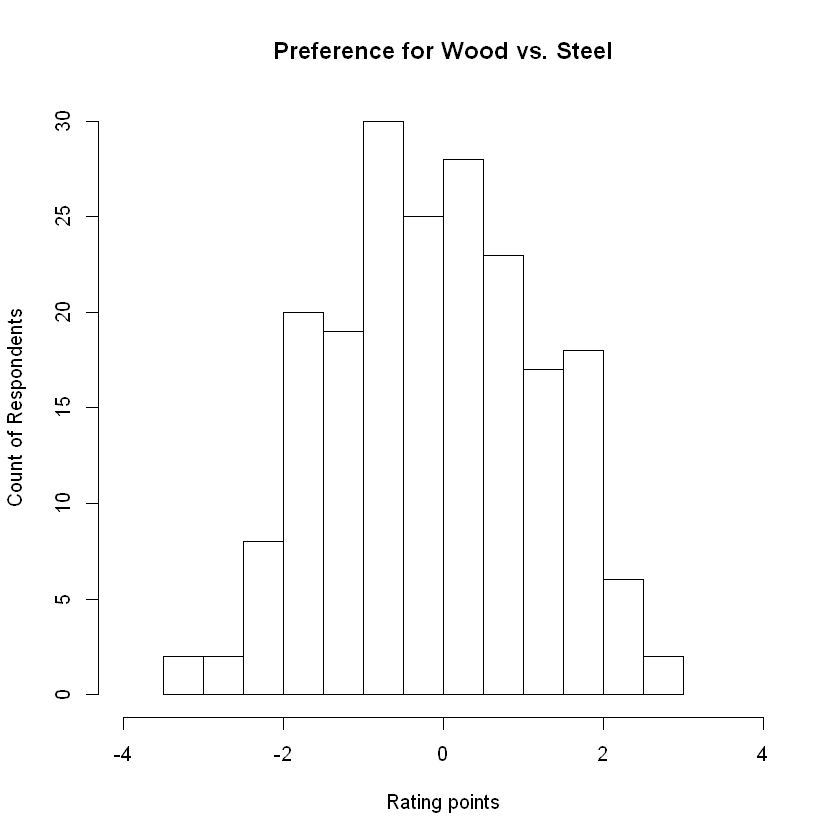

In [146]:
hist(ride.constWood$statistics[,1], main='Preference for Wood vs. Steel',
     xlab="Rating points", ylab="Count of Respondents", xlim=c(-4,4))

>In the first, we see a wide range across
individuals in preference of wood versus steel construction; some respondents have
negative preference for wood, and thus prefer steel, while others prefer wood. The
magnitude is very strong for some, corresponding to a difference in rating of up to
4 points.

We compare that to the distribution of preference for 60 mph speed (versus baseline
40mph):

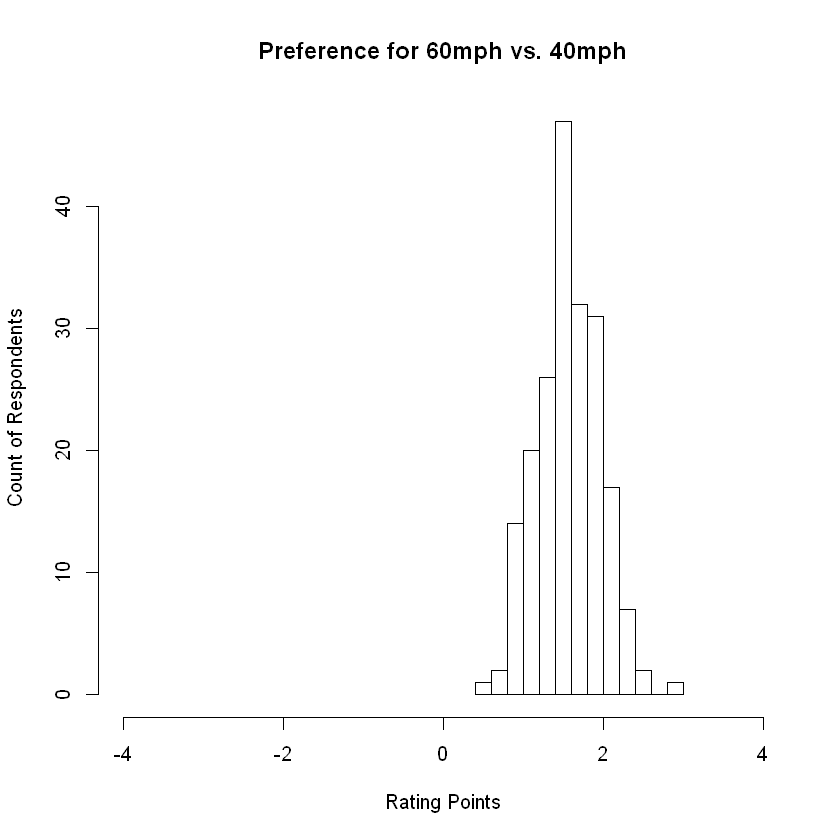

In [156]:
ride.speed60 = summary(ride.mc2$mcmc[, grepl('b.speed60', colnames(ride.mc2$mcmc))]
                      + ride.mc2$mcmc[,'beta.speed60'])
hist(ride.speed60$statistics[,1],main="Preference for 60mph vs. 40mph",
     xlab = 'Rating Points', ylab='Count of Respondents', xlim=c(-4,4))

>By comparison, in the second chart, preference for 60 mph coasters over
40 mph is less diverse; all respondents prefer the faster speed.

This degree of variation among respondents is known as ***heterogeneity***, and in
addition to estimating the parameters (coefficients) for the population (beta.
(predictor name) as we saw above), MCMChregress() also estimates
their variance and covariance across the population of respondents. 
The results are named VCV.(predictor name).(predictor name) in the output, where “VCV” abbreviates ***variance covariance***. When the two predictor names are the same, this gives the variance estimate for a single parameter; when they are different, it is the covariance of two parameters.

In [157]:
summary(ride.mc2$mcmc[, c('beta.constWood', 'VCV.constWood.constWood', 
                          'beta.speed60', 'VCV.speed60.speed60')])


Iterations = 1001:10991
Thinning interval = 10 
Number of chains = 1 
Sample size per chain = 1000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

                           Mean     SD Naive SE Time-series SE
beta.constWood          -0.1128 0.1952 0.006172       0.005615
VCV.constWood.constWood  2.3458 0.3749 0.011855       0.014056
beta.speed60             1.5691 0.1618 0.005117       0.005569
VCV.speed60.speed60      0.5782 0.1351 0.004273       0.004939

2. Quantiles for each variable:

                           2.5%     25%     50%     75%  97.5%
beta.constWood          -0.5219 -0.2464 -0.1105 0.01628 0.2698
VCV.constWood.constWood  1.7028  2.0760  2.3155 2.57251 3.1834
beta.speed60             1.2604  1.4636  1.5725 1.68365 1.8804
VCV.speed60.speed60      0.3559  0.4797  0.5664 0.66069 0.8711


> The estimated variance for constWood is quite large at 2.34, demonstrating that
there is large heterogeneity between respondents in preference for wooden roller
coasters. On the other hand, the variance of the estimates for speed60 is much
smaller at 0.58. This reflects the difference in distributions that we saw in the histograms
in Fig. 9.3.

You might wish to predict respondents’ interest in one or more fully specified roller
coaster designs, as opposed to interest in individual features. Such assessment is
typical in conjoint analysis to predict product interest and is often known as ***market
simulation***. However, there is not yet an appropriate predict() function for
MCMC models as there is for lm(). To obtain estimates of overall preference for a
design, there are two choices. 
 - One option is to calculate the net level of interest by adding the columns of the MCMC draws that match your design (plus the baseline population estimates), and then summarize the level of interest for each respondent.
 - Another option is to use a market simulation routine that compares preference between choices, such as the relative preference for your design versus some other design; an example is available in Chapman et al. [25]. We discuss preference share estimation further in Chap. 13.

One other thing we should mention with regard to this model—as is illustrated in our
data simulation and Fig. 9.3 as well as in the model’s assumptions—is that individuals’
estimates (random coefficients) are assumed to follow a ***multivariate normal
distribution***. This means that the model assumes most people’s preferences are in
the middle of the distribution. If you have reason to suspect that there are separate
groups with divergent and strong preferences, you might consider a *mixture or latent
class model*, which is outside the scope of this chapter (see [137], Chap. 5).

## 9.5 A Quick Comparison of Frequentist & Bayesian HLMs*

We saw that the estimates of the fixed effects are
nearly identical in the two models (Sect. 9.4.1). What about the random, individuallevel
effects? How similar are they?
Before examining those effects, let’s try to apply a bit of intuition to the problem.
 - First, we might consider that the fixed effects, even with 3,200 total observations are not exactly identical between the two methods. 
 - Second, we should expect that the individual-level effects, with only 16 observations per respondent would have much more variance (because variance is inversely proportional to the square root of the number of observations). When we consider that we are estimating 8 random effects per respondent given only 16 observations, we should expect a lot of uncertainty in the estimates. 
 - Third, we should understand that neither model can be regarded as true, but only expected to be (one hopes) an unbiased estimate.

We’ve seen that the mean fixed effect estimates are quite similar. We can check that
visually by plotting the eight parameters of each against those from the other model.

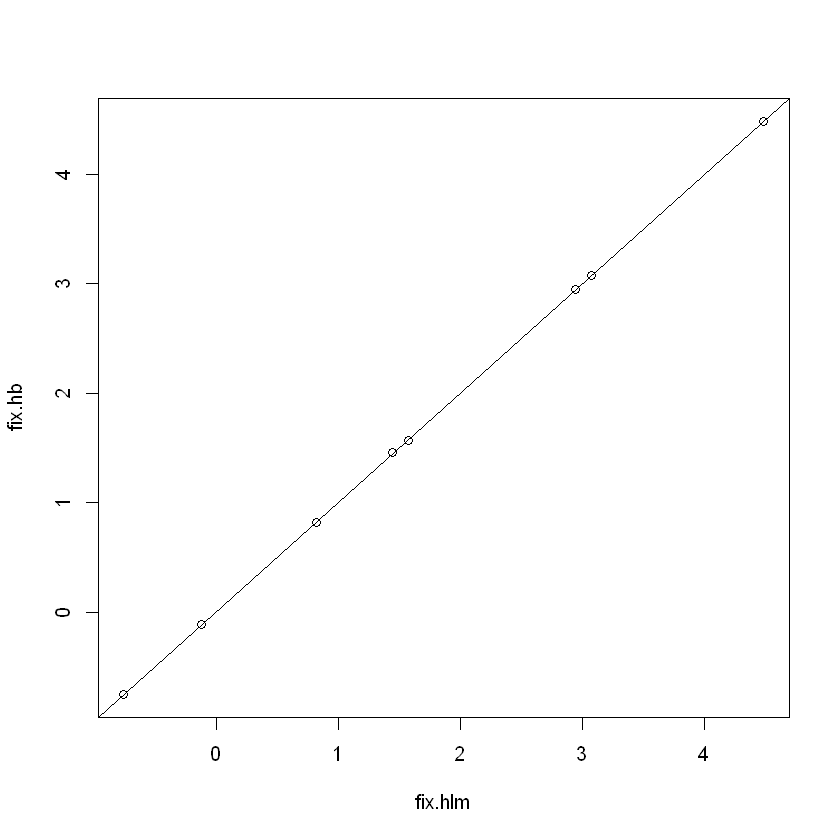

In [161]:
fix.hlm = fixef(ride.hlm2)
fix.hb  = colMeans(ride.mc2$mcmc[, 1:8])
plot(fix.hlm, fix.hb)
abline(0,1)

> Fig. 9.4. Fixed effects from the two hierarchical
models, classical and Bayesian. The
Bayesian method estimates (y-axis; estimated
using MCMCpack) are nearly identical to the
classical method estimates (x-axis; estimated
using lme4) for these simulated data.

The random effects have to be compared within respondent. We’ll do this for just
one respondent, ID 196 whom we considered above

In [165]:
ranef(ride.hlm2)$resp.id[196,]

,(Intercept),speed50,speed60,speed70,height300,height400,constWood,themeEagle
196,-0.9300076,-0.0673196,-0.3033316,0.1074113,0.004083591,-0.2346406,2.698521,-1.438097


In [166]:
colMeans(ride.mc2$mcmc[, grepl('.196', colnames(ride.mc2$mcmc))])

b.(Intercept).196     b.speed50.196     b.speed60.196     b.speed70.196 
      -1.03806213        0.44049447        0.10441996        0.03807113 
  b.height300.196   b.height400.196   b.constWood.196  b.themeEagle.196 
      -0.35414215       -0.55131679        2.57914806       -1.41954714

>There are some overall similarities in the two sets of estimates for respondent 196,
such as the strong negative effect for the eagle theme, relative to the same fixed
effect, and strong positive for a wooden roller coasts. However, there are small to modest differences in some of the mean estimates. 

>The MCMC process should
prompt you to recall that Bayesian methods estimate not only a point estimate (the
mean effect estimate reported above), but also a posterior distribution that reflects
uncertainty.

Doing this process one time—plotting the density of the MCMC draws and
then adding a distribution plot for the mean and standard deviation of the HLM
estimate—would give us a comparison of one set of parameters such as the preference
for one speed or design.We iterate that to compare multiple parameters.We do
that for parameters 2–5, the first four non-intercept parameters, as follows:
 - In the case of the HB estimates, we have 1,000 MCMC draws for each parameter,so we plot the density() estimate of those draws. For the HLM estimates, we construct a similar density estimate in the following way: we obtain the mean effect from ranef() and the standard deviation of the estimation from the “postVar” (variance) attribute of the ranef() random effect estimates for one respondent, and use those parameters to draw random points from that distribution.

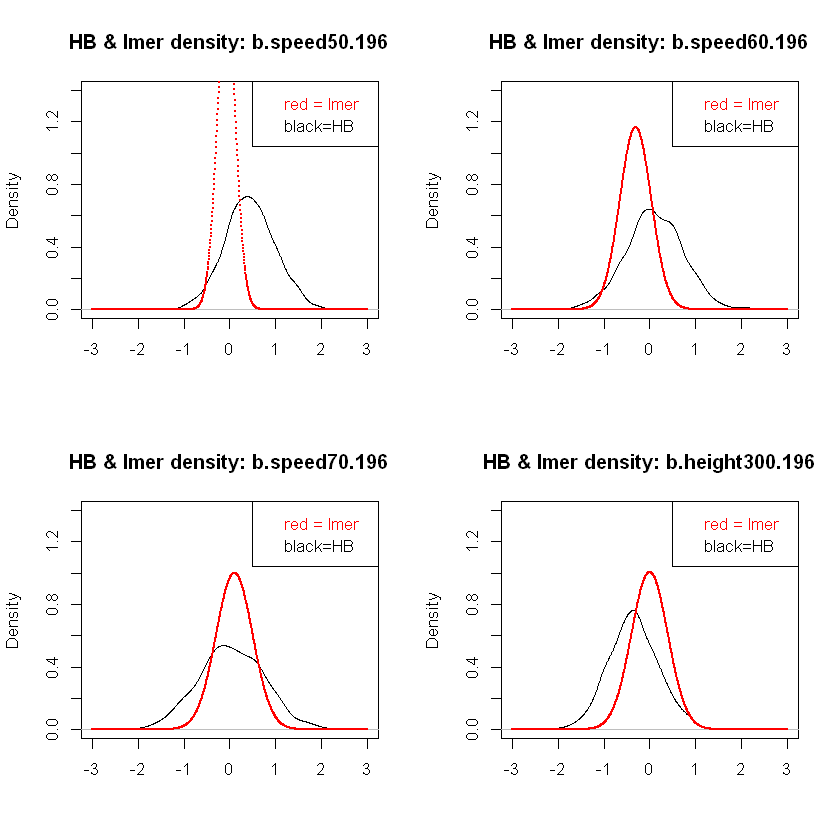

In [171]:
par(mfrow=c(2,2))         # make a 2x2 plot surface
plot.xlim  = c(-3,3)      # define limits for the x-axis
for(i in 2:5) {           # first four parameters only, for convenience
   # plot the MCMC density for random effect i
    mcmc.col = which(grepl('.196', colnames(ride.mc2$mcmc), fixed=T))[i]
    plot(density(ride.mc2$mcmc[ , mcmc.col]), xlab='',
         ylim=c(0, 1.4), xlim=plot.xlim,
         main = paste('HB & lmer density:', 
                       colnames(ride.mc2$mcmc)[mcmc.col]))
    # add the HLM density for random effect i
    
    hlm2.est = ranef(ride.hlm2)$resp.id[196,i]           #mean estimate
    hlm2.sd  = sqrt(attr(ranef(ride.hlm2, condVar = T)$resp.id,
                         'postVar')[, , 196][i, i])
    seq.pts  = seq(from = plot.xlim[1], to=plot.xlim[2], length.out=1000)
    # .. find density at x-axis points using dnorm() and add that to the plot
    points(seq.pts, dnorm(seq.pts, mean=hlm2.est, sd=hlm2.sd), 
           col='red', pch=20, cex=0.05)
    legend('topright', legend=c('red = lmer', 'black=HB'), 
            text.col = c('red', 'black'))
    
}

# This code is lengthy but should not be difficult for you to deconstruct 
# by this point.
# The two significant new elements here are that it uses attr(..., "postVar")
# to obtain the variance of the random effect estimate for the HLM model, 
# and uses dnorm() to obtain a density estimate for 1,000 points 
# that match the HLM parameter distribution estimate, which it adds 
# to the plot with points().

> The resulting chart in Fig. 9.5 shows that the density estimates from the two methods
are largely overlapping. It is also congruent with our intuition above, as the results
are different but not enormously so, and there is no reason to suspect either method is
highly discrepant because the distributions are generally similar in range and central tendency, with just slightly higher variance in the MCMC estimates. Of course this
is a comparison of only four parameters for a single respondent.

Given that the models are similar but not identical, you might wonder which is
better, the classical or the Bayesian? The models themselves do not answer that;
you would need to consider your assumptions, the degree to which you believe each
model is appropriate (see Sect. 6.6.1), and if possible, which works better for your
situation in regard to other metrics such as external validity. 

As we have noted, the
models tend to show increasingly similar estimates with larger samples, while the
***Bayesian methods may yield more intuitive or useful estimates with small numbers
of observations.***